In [8]:
from astropy.io import fits
import numpy as np
import healpy as hp
from DS_healpix_fragmentation import *
from tqdm.notebook import tqdm
from DS_WCS_projections import show_pic

In [2]:
i_st = None
with fits.open('/home/rt2122/Data/Planck/HFI_SkyMap_100_2048_R3.01_full.fits') as hdul:
    data = hdul[1].data
    i_st = np.array(data['I_STOKES'])

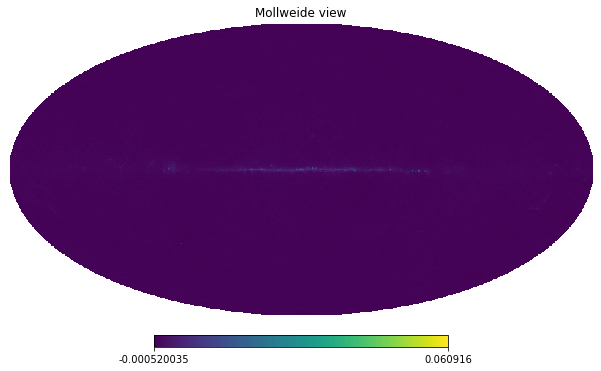

In [3]:
hp.mollview(i_st, nest=True)

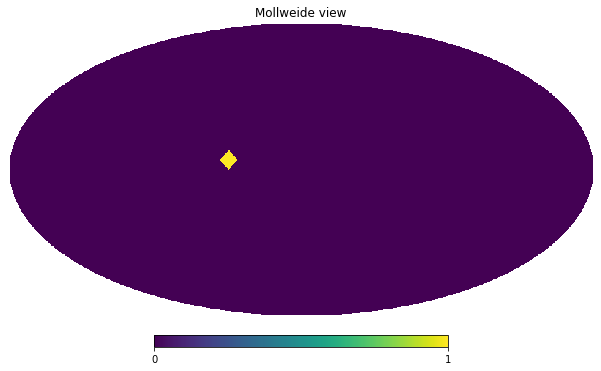

In [29]:
a = np.zeros((hp.nside2npix(8)))
a[0] = 1
hp.mollview(a, nest=True)

In [13]:
matr = one_pixel_fragmentation(8, 63, 8)

In [14]:
mdict = matr2dict(matr)

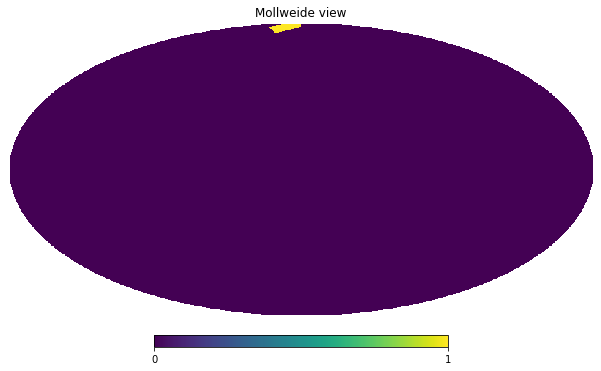

In [15]:
a = np.zeros(hp.nside2npix(2048))
for i in tqdm(mdict):
    a[i] = 1
hp.mollview(a, nest=True)

In [16]:
pic = np.zeros(matr.shape)
for pix in mdict:
    coords = mdict[pix]
    pic[coords] = i_st[pix]

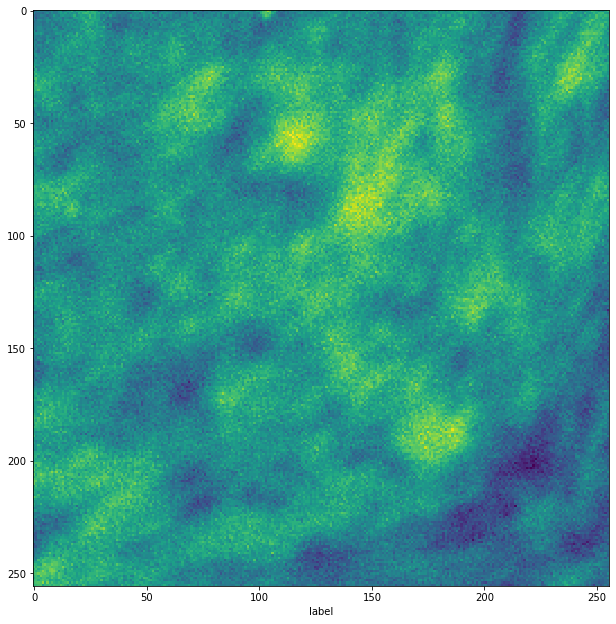

In [19]:
show_pic(pic)

In [18]:
pic *= 1000
pic -= pic.min()
pic /= pic.max()